In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [6]:
bf=pd.read_csv("dataset.csv")
bf[10:15]

comment Category  Gender  \
43996                               হিরো আলম,, এগিয়ে যাও   Social    Male   
43997  হিরো আলমকে সাপোর্ট দেওয়ার জন্য অসংখ্য ধন্যবাদ...   Social    Male   
43998                            হিরো ভাই তুমি এগিয়ে য়াও   Social    Male   
43999     হুম ভাও তোমরা এগিয়ে যাও আমরা তোমাদের পিছনে আছি    Actor  Female   
44000            হ্যালো তোমাদের সাথে কি আমাকে চ্যাট করবে   Social    Male   

       comment react number      label  
43996                   0.0  not bully  
43997                   1.0  not bully  
43998                   0.0  not bully  
43999                   1.0  not bully  
44000                   0.0  not bully

# Data summary

In [7]:
bf.columns

Index(['comment', 'Category', 'Gender', 'comment react number', 'label'], dtype='object')

In [8]:
len(bf.comment)

44001

## Gender

In [ ]:
#which gender celebrity getting more comments

<BarContainer object of 2 artists>

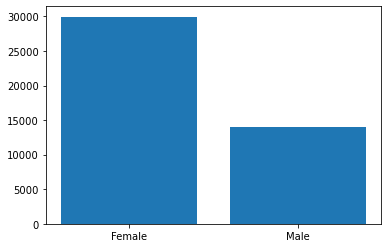

In [20]:
gg=bf['Gender'].value_counts()
plt.bar(gg.index,gg)

## category

In [ ]:
#which of category of celebrity 

<BarContainer object of 5 artists>

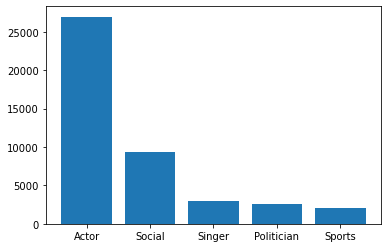

In [21]:
qq=bf['Category'].value_counts()
plt.bar(qq.index,qq)

## comment label

<BarContainer object of 5 artists>

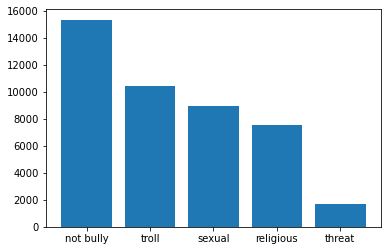

In [19]:
ww=bf['label'].value_counts()
plt.bar(ww.index, ww)

## compute the baselines

In [9]:
labels=bf.label.unique()

In [110]:
bf.label.value_counts()

not bully    15340
troll        10462
sexual        8928
religious     7577
threat        1694
Name: label, dtype: int64

In [10]:
print('random baseline {}'.format(1.0/len(labels)))

print('most common baseline?')
for label in labels:
    print(label, len(bf[bf.label==label])/len(bf))

random baseline 0.2
most common baseline?
sexual 0.202904479443649
not bully 0.34862844026272133
troll 0.23776732346992113
religious 0.17220063180382264
threat 0.038499125019885914


# The theoretical baseline

In [449]:
theoretical_baseline=0.20**2+0.3486**2+0.23776**2+0.172**2+0.03849**2
theoretical_baseline

0.2491172577

In [ ]:
sexual 0.20,not bully 0.348,troll 0.237,religious 0.172,threat 0.038

theoretical_baseline=0.20**2+0.3486**2+0.23776**2+0.172**2+0.03849**2

## comment according to gender of celebrities 

<AxesSubplot:xlabel='label', ylabel='Count'>

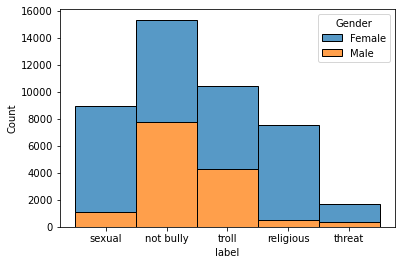

In [11]:
sns.histplot(binwidth=0.5, x="label", hue="Gender", data=bf, stat="count", multiple="stack")

In [12]:
bygender = bf.groupby("Gender").label.value_counts(normalize=True)

In [35]:
bygender

Gender  label    
Female  sexual       0.260301
        not bully    0.251987
        religious    0.236594
        troll        0.206010
        threat       0.045109
Male    not bully    0.554622
        troll        0.305459
        sexual       0.080564
        religious    0.034944
        threat       0.024411
Name: label, dtype: float64

## comment according to category of celebrities

<AxesSubplot:xlabel='label', ylabel='Count'>

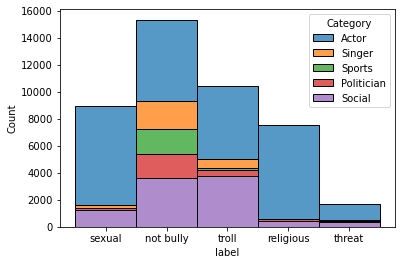

In [23]:
sns.histplot(binwidth=0.5, x="label", hue="Category", data=bf, stat="count", multiple="stack")

In [13]:
bycategory = bf.groupby(['Category','Gender']).label.value_counts(normalize=True)

In [56]:
ct=pd.crosstab(bf.Gender, bf.label)
ct

label   not bully  religious  sexual  threat  troll
Gender                                             
Female       7547       7086    7796    1351   6170
Male         7793        491    1132     343   4292

In [59]:
ct['total']=ct.sum(axis=1)
ct

label   not bully  religious  sexual  threat  troll  total
Gender                                                    
Female       7547       7086    7796    1351   6170  29950
Male         7793        491    1132     343   4292  14051

In [70]:
ct['percent']=np.round(ct.total/ct.total.sum(),4)*100
ct

label   not bully  religious  sexual  threat  troll  total  percent
Gender                                                             
Female       7547       7086    7796    1351   6170  29950    68.07
Male         7793        491    1132     343   4292  14051    31.93

In [58]:
ct.sum(axis=1)

Gender
Female    29950
Male      14051
dtype: int64

In [57]:
ct.sum()

label
not bully    15340
religious     7577
sexual        8928
threat        1694
troll        10462
dtype: int64

In [111]:
pd.DataFrame(bycategory)

label
Category   Gender label              
Actor      Female sexual     0.282210
                  religious  0.268631
                  troll      0.207375
                  not bully  0.195957
                  threat     0.045826
           Male   not bully  0.893866
                  troll      0.073028
                  sexual     0.022395
                  religious  0.010711
Politician Female not bully  0.871122
                  troll      0.096659
                  threat     0.025060
                  sexual     0.007160
           Male   not bully  0.583287
                  troll      0.212256
                  sexual     0.103064
                  religious  0.084680
                  threat     0.016713
Singer     Female not bully  0.859968
                  troll      0.079905
                  threat     0.023734
                  sexual     0.022152
                  religious  0.014241
           Male   not bully  0.573675
                  troll      0.336051
                  sexual     0.081538
                  threat     0.006407
                  religious  0.002330
Social     Female troll      0.371943
                  sexual     0.277349
                  not bully  0.215573
                  threat     0.070142
                  religious  0.064994
           Male   not bully  0.417082
                  troll      0.407365
                  sexual     0.099731
                  religious  0.040020
                  threat     0.035801
Sports     Female not bully  0.851351
                  troll      0.091892
                  sexual     0.040541
                  religious  0.008108
                  threat     0.008108
           Male   not bully  0.934950
                  troll      0.043170
                  threat     0.013010
                  religious  0.006505
                  sexual     0.002365

# Data cleaning function

In [76]:
# print some unprocessed reviews
sample_data = [100,150,200,250,600,650,666,689,640,650,700,750,800,1000]
#for i in sample_data:
      #print(bf.comment[i],'\n','Sentiment:-- ',bf.label[i],'\n')

In [9]:
import re
def process_comments(comment): 
    comment = re.sub('[^\u0980-\u09FF]',' ',str(comment)) #removing unnecessary punctuation
    comment=comment.split()
    comment = ' '.join(comment)
    return comment

In [10]:
# Apply the function into the dataframe
bf['cleaned'] = bf['comment'].apply(process_comments)  

# print some cleaned reviews from the dataset
sample_data = [100,854,966,1500,1589,1700,2000,2500,4000]
for i in sample_data:
     print('Original:\n',bf.comment[i],'\nCleaned:\n',
           bf.cleaned[i],'\n','Sentiment:-- ',bf.label[i],'\n')

Original:
 কোনটা ছেড়ে কোনটা রাখি...।  অসাধারণ ........অসাধারণ ..............।।তিশার তুলনা আমার কাছে শুধুই তিশা...............। 
Cleaned:
 কোনটা ছেড়ে কোনটা রাখি অসাধারণ অসাধারণ তিশার তুলনা আমার কাছে শুধুই তিশা 
 Sentiment:--  not bully 

Original:
 কমেন্ট পড়তে আসছিলাম, এখন আমি ৭দিন পাগল থাকব 
Cleaned:
 কমেন্ট পড়তে আসছিলাম এখন আমি ৭দিন পাগল থাকব 
 Sentiment:--  not bully 

Original:
 সৃষ্টির ধারনা স্রষ্টার কাছ থেকেই এসেছে যা শুধু তার সৃষ্টির জন্য প্রযোজ্য,সৃষ্টার জন্য নয়। 
Cleaned:
 সৃষ্টির ধারনা স্রষ্টার কাছ থেকেই এসেছে যা শুধু তার সৃষ্টির জন্য প্রযোজ্য সৃষ্টার জন্য নয় 
 Sentiment:--  religious 

Original:
 ও ভাই শ্লোগান দিয়েন না, আগামীকাল হরতাল হরতাল! Gazi Mansur Ahmed Rasel 
Cleaned:
 ও ভাই শ্লোগান দিয়েন না আগামীকাল হরতাল হরতাল 
 Sentiment:--  troll 

Original:
 নাস্তিক পন্থি পেজ 
Cleaned:
 নাস্তিক পন্থি পেজ 
 Sentiment:--  religious 

Original:
 ক্ষমার সোদনে আমরা শিহরিত--ড্রামা করার জায়গা পাওনা নষ্ট মেয়ে...? এসব ড্রামা নাটকেই গিয়া করিও...পরকাল বিশ্বাস করোনা আবার আল্লাহ আল্

# Data Summary

In [11]:
import nltk
from nltk import FreqDist

In [73]:
def data_summary(dataset):
    
    """
    This function will print the summary of the reviews and words distribution in the dataset. 
    
    Args:
        dataset: list of cleaned sentences   
        
    Returns:
        Number of documnets per class: int 
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(bf.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in bf.label.value_counts().to_dict().items()]
    # find word list
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(bf[bf.label==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(bf[bf.label==label].cleaned)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of comments:{}".format(len(list(bf[bf.label==label].cleaned))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(bf)


Class Name :  not bully
Number of comments:15340
Number of Words:187427
Number of Unique Words:23227
Most Frequent Words:

না	2785
আল্লাহ	1865
করে	1806
ভাই	1742
আপনার	1479
হিরো	1437
আলম	1376
কি	1294
এই	1268
আর	1251

Class Name :  troll
Number of comments:10462
Number of Words:153363
Number of Unique Words:21552
Most Frequent Words:

না	3265
কি	1798
করে	1634
আর	1345
এই	1301
হিরো	1031
তো	1017
তুই	909
কে	902
বিশ্বাস	881

Class Name :  sexual
Number of comments:8928
Number of Words:176236
Number of Unique Words:22787
Most Frequent Words:

না	3673
করে	1879
কি	1678
মাগি	1500
আর	1408
বিশ্বাস	1343
তুই	1333
এই	1198
আমি	1142
তোর	1130

Class Name :  religious
Number of comments:7577
Number of Words:199677
Number of Unique Words:20385
Most Frequent Words:

নাস্তিক	5316
না	4965
করে	2615
বিশ্বাস	2262
কি	1994
আর	1958
তুই	1720
আল্লাহ	1638
এই	1567
যে	1497

Class Name :  threat
Number of comments:1694
Number of Words:29090
Number of Unique Words:6426
Most Frequent Words:

জুতা	762
না	501
করে	346
এই	307

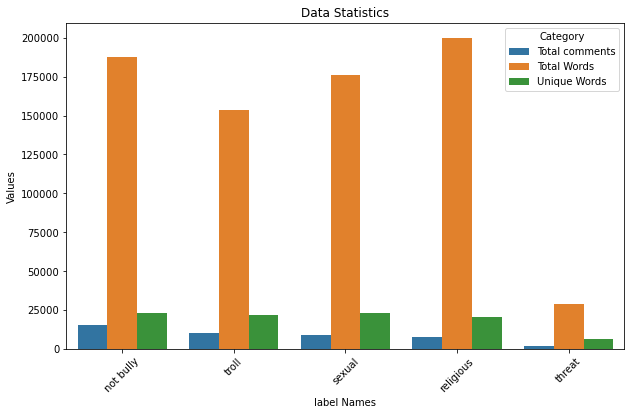

In [74]:
data_matrix = pd.DataFrame({'Total comments':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'label Names':class_names})
df = pd.melt(data_matrix, id_vars="label Names", var_name="Category", value_name="Values")
plt.figure(figsize=(10, 6))
ax = plt.subplot()

sns.barplot(data=df,x='label Names', y='Values' ,hue='Category')
ax.set_xlabel('label Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

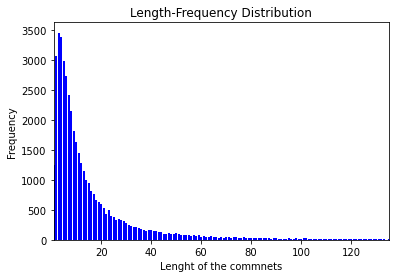

Maximum Length of a review: 241
Minimum Length of a review: 1
Average Length of a reviews: 17.0


In [304]:
# Calculate the Review of each of the Review
bf['ReviewLength'] = bf.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in bf.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the commnets')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a review: {max(bf.ReviewLength)}")
print(f"Minimum Length of a review: {min(bf.ReviewLength)}")
print(f"Average Length of a reviews: {round(np.mean(bf.ReviewLength),0)}")

In [13]:
#total=len(bf['comment'])

def lexical_diversity(comment):
    return len(set(comment))/len(comment)
def percentage (count,total):
    return 100 *count /total

In [14]:
lexical_diversity(bf['comment'])

0.9901365878048226

# Using Bangla Stopwords and Tokenizer Remove stopwords and tokenize

In [18]:
import bnlp

from bangla_stemmer.stemmer import stemmer
from bnlp import NLTKTokenizer
from bnlp import BasicTokenizer

from bnlp.corpus import stopwords
from bnlp.corpus.util import remove_stopwords

/Users/maishamaliha/.local/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [19]:
stopwords_ = stopwords
basic_t = BasicTokenizer()

In [20]:
tokens = basic_t.tokenize(cmnt[2])
print(tokens)


['অরে', 'বাবা', 'এই', 'টা', 'কোন', 'পাগল']


In [21]:
#basic_t.tokenize(cmnt[0])

In [737]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [738]:
cv = CountVectorizer()

In [739]:
X_transformed = cv.fit_transform(cmnt)
X_transformed 

<44001x6273 sparse matrix of type '<class 'numpy.int64'>'
	with 337546 stored elements in Compressed Sparse Row format>

In [22]:
len(cv.get_feature_names_out())

6273

In [38]:
#cv.get_feature_names()

In [51]:
pd.DataFrame(X_transformed.toarray(), columns=cv.get_feature_names_out())

অঅঅঅক  অই  অইখ  অইগ  অইচ  অইচস  অইছ  অইট  অইড  অইত  ...  ৷শ  ৷স  ৷সচ  \
0          0   0    0    0    0     0    0    0    0    0  ...   0   0    0   
1          0   0    0    0    0     0    0    0    0    0  ...   0   0    0   
2          0   0    0    0    0     0    0    0    0    0  ...   0   0    0   
3          0   0    0    0    0     0    0    0    0    0  ...   0   0    0   
4          0   0    0    0    0     0    0    0    0    0  ...   0   0    0   
...      ...  ..  ...  ...  ...   ...  ...  ...  ...  ...  ...  ..  ..  ...   
43996      0   0    0    0    0     0    0    0    0    0  ...   0   0    0   
43997      0   0    0    0    0     0    0    0    0    0  ...   0   0    0   
43998      0   0    0    0    0     0    0    0    0    0  ...   0   0    0   
43999      0   0    0    0    0     0    0    0    0    0  ...   0   0    0   
44000      0   0    0    0    0     0    0    0    0    0  ...   0   0    0   

       ৷৷  ৷৷আর  ৷৷ন  ৷৷ভ  ৷৷৷  ৷৷৷৷  ৷৷৷৷৷৷৷৷৷৷৷৷৷৷৷৷৷৷৷৷৷৷৷৷৷  
0       0     0    0    0    0     0                          0  
1       0     0    0    0    0     0                          0  
2       0     0    0    0    0     0                          0  
3       0     0    0    0    0     0                          0  
4       0     0    0    0    0     0                          0  
...    ..   ...  ...  ...  ...   ...                        ...  
43996   0     0    0    0    0     0                          0  
43997   0     0    0    0    0     0                          0  
43998   0     0    0    0    0     0                          0  
43999   0     0    0    0    0     0                          0  
44000   0     0    0    0    0     0                          0  

[44001 rows x 6273 columns]

In [28]:
'অঅঅঅক' in cv.get_feature_names_out()

True

# Stemming Using Bangla Stemmer

In [23]:
def cleaning(data):
    absolve_list = []
    
    for absolve in data:
        stmr = stemmer.BanglaStemmer()
        bnltk=NLTKTokenizer()
        absolve = bnltk.word_tokenize(absolve)
        
        absolve = [ stmr.stem(word) for word in absolve if not word in set(stopwords_)]
        absolve = " ".join(absolve)
        absolve_list.append(absolve)
        
    return absolve_list

In [24]:
bf["clean"] = cleaning(bf.cleaned)


applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied second rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied first rules..
applied second rules..
appl

In [548]:
fd=FreqDist(df["stop_clean"])

In [576]:
fd1=fd.most_common(7)

In [578]:
fd2=pd.DataFrame(fd1, columns= ['word','frequency'])

In [579]:
fd2=fd2.drop([0])

In [582]:
new_column_values = ['Atheist ','Beautiful ','Mad','God has willed','Son of Atheist','Brother']

fd2["translation"] = new_column_values 

In [586]:

fd3 = fd2.drop('new_Column', 1)

/var/folders/t3/8m7rjl8j22z_t862rt5lvyrr0000gr/T/ipykernel_93051/2442753796.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  fd3 = fd2.drop('new_Column', 1)


In [587]:
fd3

word  frequency     translation
1         নাস্তিক         85        Atheist 
2          সুন্দর         45      Beautiful 
3            পাগল         25             Mad
4      মাশাআল্লাহ         22  God has willed
5  নাস্তিক বাচ্চা         21  Son of Atheist
6             ভাই         21         Brother

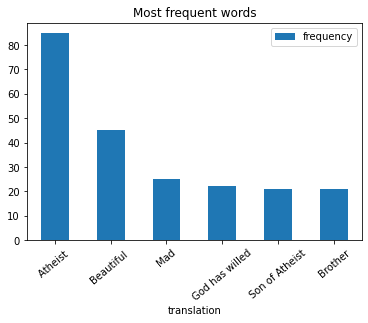

In [595]:
# Draw a vertical bar chart

fd3.plot.bar(x="translation", y="frequency", rot=40, title="Most frequent words");



# splitting

In [535]:
df=bf.rename(columns={"clean": "stop_clean"}).copy()
df.head()

comment    Category  Gender  \
0  ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...       Actor  Female   
1  ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...      Singer    Male   
2                       অরে বাবা, এই টা কোন পাগল????       Actor  Female   
3                              ক্যাপ্টেন অফ বাংলাদেশ      Sports    Male   
4                                           পটকা মাছ  Politician    Male   

   comment react number      label  \
0                   1.0     sexual   
1                   2.0  not bully   
2                   2.0  not bully   
3                   0.0  not bully   
4                   0.0      troll   

                                             cleaned  \
0  ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...   
1   ঘরে বসে শুট করতে কেমন লেগেছে ক্যামেরাতে কে ছিলেন   
2                            অরে বাবা এই টা কোন পাগল   
3                              ক্যাপ্টেন অফ বাংলাদেশ   
4                                           পটকা মাছ   

                                          stop_clean  
0  হালা পুত মদ খাওয় সময় রাত বেলা মদ খাই দিন বেল...  
1                          ঘরে শুট কেমন লাগ ক্যামেরা  
2                                   অরে বাবা টা পাগল  
3                                ক্যাপ্ট অফ বাংলাদেশ  
4                                           পটকা মাছ

In [329]:
X_train, X_test, y_train, y_test = train_test_split(
    df['stop_clean'], df['label'],
    test_size=0.30, stratify=df['label'],
    random_state=10
)

# SVM

In [334]:
svc = Pipeline(steps=[
    ('vectorizer', TfidfVectorizer(ngram_range=(1,2))),
    ('clf', SVC(max_iter=1000))
])

svc.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:284: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Pipeline(steps=[('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
                ('clf', SVC(max_iter=1000))])

In [335]:
print('Testing Accuracy: {}'.format(svc.score(X_test, y_test)))

Testing Accuracy: 0.4123172486932808


In [403]:
y_pred=svc.predict(X_test)
target_names = ['not bully', 'Religious ', 'Sexual ','threat','troll']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   not bully       0.52      0.67      0.58      4602
  Religious        0.29      0.55      0.38      2273
     Sexual        0.34      0.07      0.11      2679
      threat       0.25      0.11      0.15       508
       troll       0.39      0.28      0.32      3139

    accuracy                           0.41     13201
   macro avg       0.36      0.34      0.31     13201
weighted avg       0.40      0.41      0.38     13201



# Logistic regression

In [336]:
logit = Pipeline(steps=[
    ('vectorizer', TfidfVectorizer(ngram_range=(1,2))),
    ('clf', LogisticRegression(max_iter=1000))
])

logit.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer(ngram_range=(1, 2))),
                ('clf', LogisticRegression(max_iter=1000))])

In [33]:
print('Testing Accuracy: {}'.format(logit.score(X_test, y_test)))

Testing Accuracy: 0.5588213014165594


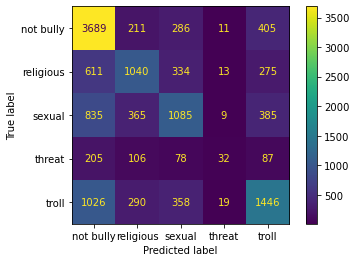

In [73]:
ConfusionMatrixDisplay.from_estimator(logit, X_test, y_test);

In [402]:
y_pred=logit.predict(X_test)
target_names = ['not bully', 'Religious ', 'Sexual ','threat','troll']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   not bully       0.59      0.81      0.68      4602
  Religious        0.51      0.47      0.49      2273
     Sexual        0.52      0.42      0.46      2679
      threat       0.41      0.05      0.09       508
       troll       0.58      0.47      0.52      3139

    accuracy                           0.56     13201
   macro avg       0.52      0.44      0.45     13201
weighted avg       0.55      0.56      0.54     13201



# MultinomialNB

In [400]:
mnb = Pipeline(steps=[
    ('vectorizer', TfidfVectorizer()),
    ('clf', MultinomialNB())
])

mnb.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()), ('clf', MultinomialNB())])

In [87]:
print('Testing Accuracy: {}'.format(mnb.score(X_test, y_test)))

Testing Accuracy: 0.538822816453299


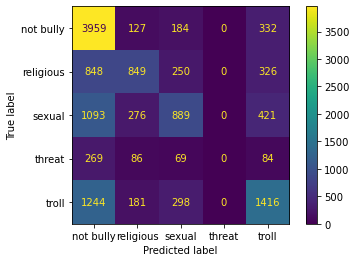

In [88]:
ConfusionMatrixDisplay.from_estimator(mnb, X_test, y_test);

In [401]:
y_pred=mnb.predict(X_test)
target_names = ['not bully', 'Religious ', 'Sexual ','threat','troll']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   not bully       0.53      0.86      0.66      4602
  Religious        0.56      0.37      0.45      2273
     Sexual        0.53      0.33      0.41      2679
      threat       0.00      0.00      0.00       508
       troll       0.55      0.45      0.50      3139

    accuracy                           0.54     13201
   macro avg       0.43      0.40      0.40     13201
weighted avg       0.52      0.54      0.51     13201



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# decision tree

In [265]:
from sklearn.tree import DecisionTreeClassifier

In [397]:
dtree = Pipeline(steps=[
    ('vectorizer', TfidfVectorizer()),
    ('clf',DecisionTreeClassifier())
])

dtree.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('clf', DecisionTreeClassifier())])

In [270]:
print('Testing Accuracy: {}'.format(dtree.score(X_test, y_test)))

Testing Accuracy: 0.49640178774335275


In [398]:
y_pred=dtree.predict(X_test)
target_names = ['not bully', 'Religious ', 'Sexual ','threat','troll']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   not bully       0.56      0.72      0.63      4602
  Religious        0.43      0.37      0.40      2273
     Sexual        0.45      0.39      0.41      2679
      threat       0.18      0.10      0.13       508
       troll       0.48      0.42      0.45      3139

    accuracy                           0.50     13201
   macro avg       0.42      0.40      0.40     13201
weighted avg       0.48      0.50      0.48     13201



# KNN

In [337]:
KNN = Pipeline(steps=[
    ('vectorizer', TfidfVectorizer()),
    ('clf',KNeighborsClassifier())
])

KNN.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('clf', KNeighborsClassifier())])

In [339]:
print('Testing Accuracy: {}'.format(KNN.score(X_test, y_test)))

Testing Accuracy: 0.4626164684493599


In [386]:
y_pred=KNN.predict(X_test)

In [384]:
precision_score(y_test,pred,average='weighted')

0.4445015566773173

In [395]:
target_names = ['not bully', 'Religious ', 'Sexual ','threat','troll']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   not bully       0.49      0.78      0.60      4602
  Religious        0.40      0.28      0.33      2273
     Sexual        0.41      0.29      0.34      2679
      threat       0.14      0.05      0.08       508
       troll       0.49      0.35      0.41      3139

    accuracy                           0.46     13201
   macro avg       0.39      0.35      0.35     13201
weighted avg       0.44      0.46      0.43     13201



# compare classifier

In [683]:
my_data = [{'accuracy': 0.41, 'precision':0.40,'recall':0.41 , 'f1-score':0.38},
        {'accuracy': 0.56, 'precision':0.55,'recall':0.56 , 'f1-score':0.54},
        {'accuracy':0.54 , 'precision':0.52,'recall':0.54 , 'f1-score':0.51 },
       {'accuracy': 0.50, 'precision':0.48 ,'recall': 0.50 , 'f1-score':0.48},
       {'accuracy': 0.46, 'precision':0.44,'recall': 0.46 , 'f1-score':0.43}]
 
# Creates pandas DataFrame by passing
# Lists of dictionaries and row index.
Ml_models = pd.DataFrame(my_data, index =['SVM','Logit','MNB','DT', 'KNN'])


In [682]:
Ml_models

accuracy  precision  recall  f1-score
SVM        0.41       0.40    0.41      0.38
Logit      0.56       0.55    0.56      0.54
MNB        0.54       0.52    0.54      0.51
DT         0.50       0.48    0.50      0.48
KNN        0.46       0.44    0.46      0.43

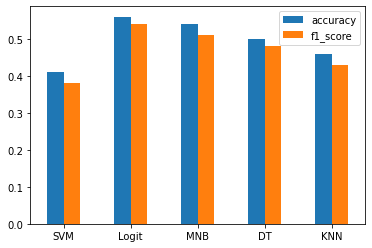

In [423]:
accuracy = [0.41,0.56,0.54, 0.50,0.46]
f1_score= [0.38,0.54,.51,.48,.43]  

   
index =['SVM','Logit','MNB','DT', 'KNN']
ml_df = pd.DataFrame({'accuracy':accuracy,'f1_score':f1_score}, index=index)
ax = ml_df.plot.bar(rot=0)

In [ ]:
#

# Deep Neural network 

In [473]:
from sklearn import preprocessing
import tensorflow as tf

In [ ]:
tf.random.set_seed(1234)

In [475]:
le = preprocessing.LabelEncoder()
ohe = preprocessing.OneHotEncoder()
le.fit(df.label) 
y = le.transform(df.label).reshape(-1, 1)
ohe.fit(y)
y = ohe.transform(y).todense()
X = X_transformed.toarray()
X.shape, y.shape

((44001, 6273), (44001, 5))

In [477]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=10
)

In [62]:
import tensorflow as tf
import os
#import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [713]:

model2 = tf.keras.Sequential([
  tf.keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(6273,)),  # input shape required
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(5, activation= tf.nn.softmax)
])

In [714]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["Accuracy"])

In [715]:
model2.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               3212288   
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 3,344,901
Trainable params: 3,344,901
Non-trainable params: 0
_________________________________________________________________


In [720]:
# Fit the model
history = model2.fit(X, y, validation_split=0.4, epochs=5, batch_size=32)

Epoch 1/5
825/825 [==============================] - 14s 16ms/step - loss: 1.2258 - Accuracy: 0.5038 - val_loss: 1.1219 - val_Accuracy: 0.5546
Epoch 2/5
825/825 [==============================] - 13s 16ms/step - loss: 1.0619 - Accuracy: 0.5841 - val_loss: 1.1115 - val_Accuracy: 0.5620
Epoch 3/5
825/825 [==============================] - 18s 22ms/step - loss: 0.9409 - Accuracy: 0.6362 - val_loss: 1.1256 - val_Accuracy: 0.5616
Epoch 4/5
825/825 [==============================] - 18s 22ms/step - loss: 0.8372 - Accuracy: 0.6803 - val_loss: 1.1536 - val_Accuracy: 0.5638
Epoch 5/5
825/825 [==============================] - 18s 22ms/step - loss: 0.7346 - Accuracy: 0.7203 - val_loss: 1.2293 - val_Accuracy: 0.5595


In [507]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


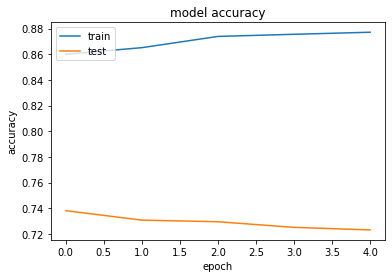

In [520]:
# summarize history for accuracy
plt.plot(history.history['Accuracy'])
plt.plot(history.history['val_Accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

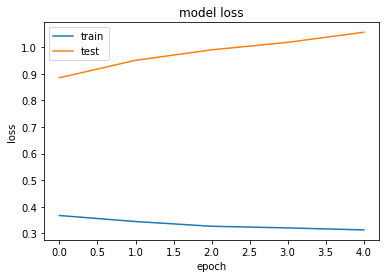

In [521]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [609]:
ypredAnn=model2.predict(X_test)

In [624]:
y1=np.argmax(ypredAnn, axis=1)
y2=np.ravel(np.argmax(y_test, axis=1))

In [639]:
from sklearn.metrics import f1_score, ConfusionMatrixDisplay, confusion_matrix

In [631]:
acc=accuracy_score(y1,y2)
pre=precision_score(y1,y2,average='weighted')
rec=recall_score(y1,y2,average='weighted')
f1=f1_score(y1,y2,average='weighted')

In [634]:
pd.DataFrame({
    
    'metrics':[acc, pre, rec, f1]
    
},
    index=['Accuracy', 'Precision', 'Recall', 'f1_score']
)

metrics
Accuracy   0.740701
Precision  0.756088
Recall     0.740701
f1_score   0.744404

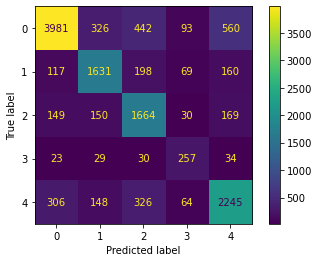

In [643]:
ConfusionMatrixDisplay(confusion_matrix(y1,y2)).plot()
plt.show()

In [619]:
y_test

matrix([[0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.],
        ...,
        [0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 1., 0., 0., 0.]])

In [614]:
j=pd.DataFrame(ypredAnn)
j

0         1         2         3         4
0      0.033635  0.054952  0.426176  0.011072  0.474165
1      0.008972  0.091982  0.501296  0.388477  0.009274
2      0.307019  0.174460  0.025339  0.005115  0.488068
3      0.129165  0.345129  0.173567  0.208490  0.143649
4      0.001303  0.030760  0.010347  0.004027  0.953563
...         ...       ...       ...       ...       ...
13196  0.013628  0.585564  0.339998  0.059482  0.001327
13197  0.000275  0.007531  0.013793  0.008897  0.969503
13198  0.004218  0.019163  0.966881  0.000813  0.008925
13199  0.000086  0.978691  0.002844  0.011188  0.007191
13200  0.000003  0.999527  0.000195  0.000025  0.000250

[13201 rows x 5 columns]

In [615]:
j.sum(axis=1)

0        1.0
1        1.0
2        1.0
3        1.0
4        1.0
        ... 
13196    1.0
13197    1.0
13198    1.0
13199    1.0
13200    1.0
Length: 13201, dtype: float32

In [128]:
tf.random.set_seed(1234)

In [129]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(512, activation=tf.nn.relu, input_shape=(6273,)),  # input shape required
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(5, activation= tf.nn.softmax)
])

In [130]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
963/963 [==============================] - 12s 12ms/step - loss: 1.2068 - accuracy: 0.5192
Epoch 2/25
963/963 [==============================] - 11s 12ms/step - loss: 1.0547 - accuracy: 0.5836
Epoch 3/25
963/963 [==============================] - 14s 15ms/step - loss: 0.9452 - accuracy: 0.6326
Epoch 4/25
963/963 [==============================] - 12s 13ms/step - loss: 0.8449 - accuracy: 0.6738
Epoch 5/25
963/963 [==============================] - 11s 11ms/step - loss: 0.7580 - accuracy: 0.7082
Epoch 6/25
963/963 [==============================] - 12s 12ms/step - loss: 0.6845 - accuracy: 0.7351
Epoch 7/25
963/963 [==============================] - 12s 12ms/step - loss: 0.6303 - accuracy: 0.7580
Epoch 8/25
963/963 [==============================] - 11s 11ms/step - loss: 0.5846 - accuracy: 0.7769
Epoch 9/25
963/963 [==============================] - 12s 12ms/step - loss: 0.5498 - accuracy: 0.7881
Epoch 10/25
963/963 [==============================] - 11s 12ms/step - loss: 0.527

In [131]:
model.evaluate(X_test,y_test)

413/413 [==============================] - 2s 3ms/step - loss: 2.2529 - accuracy: 0.5550


[2.2529404163360596, 0.5549579858779907]

In [132]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(712, activation=tf.nn.relu, input_shape=(6273,)),  # input shape required
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(356, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(5, activation= tf.nn.softmax)
])

In [133]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=35, batch_size=35)

Epoch 1/35
880/880 [==============================] - 23s 26ms/step - loss: 1.2069 - accuracy: 0.5198
Epoch 2/35
880/880 [==============================] - 21s 24ms/step - loss: 1.0475 - accuracy: 0.5905
Epoch 3/35
880/880 [==============================] - 26s 29ms/step - loss: 0.9268 - accuracy: 0.6379
Epoch 4/35
880/880 [==============================] - 21s 24ms/step - loss: 0.8144 - accuracy: 0.6853
Epoch 5/35
880/880 [==============================] - 22s 25ms/step - loss: 0.7174 - accuracy: 0.7242
Epoch 6/35
880/880 [==============================] - 21s 24ms/step - loss: 0.6343 - accuracy: 0.7569
Epoch 7/35
880/880 [==============================] - 22s 25ms/step - loss: 0.5847 - accuracy: 0.7770
Epoch 8/35
880/880 [==============================] - 21s 24ms/step - loss: 0.5457 - accuracy: 0.7919
Epoch 9/35
880/880 [==============================] - 21s 24ms/step - loss: 0.5128 - accuracy: 0.8041
Epoch 10/35
880/880 [==============================] - 24s 27ms/step - loss: 0.488

In [134]:
model.evaluate(X_test,y_test)

413/413 [==============================] - 2s 5ms/step - loss: 2.8116 - accuracy: 0.5591


[2.8116443157196045, 0.5591242909431458]

In [136]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.50,
    random_state=10
)

In [137]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(412, activation=tf.nn.relu, input_shape=(6273,)),  # input shape required
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(5, activation= tf.nn.softmax)
])

In [138]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, batch_size=35)

Epoch 1/20
629/629 [==============================] - 12s 18ms/step - loss: 1.2417 - accuracy: 0.4987
Epoch 2/20
629/629 [==============================] - 10s 17ms/step - loss: 1.0707 - accuracy: 0.5854
Epoch 3/20
629/629 [==============================] - 9s 15ms/step - loss: 0.9608 - accuracy: 0.6296
Epoch 4/20
629/629 [==============================] - 9s 14ms/step - loss: 0.8597 - accuracy: 0.6710
Epoch 5/20
629/629 [==============================] - 10s 16ms/step - loss: 0.7646 - accuracy: 0.7068
Epoch 6/20
629/629 [==============================] - 9s 14ms/step - loss: 0.6959 - accuracy: 0.7345
Epoch 7/20
629/629 [==============================] - 9s 14ms/step - loss: 0.6369 - accuracy: 0.7564
Epoch 8/20
629/629 [==============================] - 9s 14ms/step - loss: 0.5838 - accuracy: 0.7784
Epoch 9/20
629/629 [==============================] - 9s 15ms/step - loss: 0.5512 - accuracy: 0.7911
Epoch 10/20
629/629 [==============================] - 9s 14ms/step - loss: 0.5264 - acc

In [139]:
model.evaluate(X_test,y_test)

688/688 [==============================] - 3s 3ms/step - loss: 2.0767 - accuracy: 0.5454


[2.076727867126465, 0.5454297661781311]

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.40,
    random_state=10
)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(312, activation=tf.nn.tanh, input_shape=(6273,)),  # input shape required
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(156, activation=tf.nn.tanh),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(5, activation= tf.nn.softmax)
]) 



2022-04-18 15:46:03.225484: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [64]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=25)

Epoch 1/10
1056/1056 [==============================] - 9s 8ms/step - loss: 1.2420 - accuracy: 0.5079
Epoch 2/10
1056/1056 [==============================] - 9s 8ms/step - loss: 1.1140 - accuracy: 0.5669
Epoch 3/10
1056/1056 [==============================] - 10s 9ms/step - loss: 1.0652 - accuracy: 0.5834
Epoch 4/10
1056/1056 [==============================] - 9s 9ms/step - loss: 1.0327 - accuracy: 0.5958
Epoch 5/10
1056/1056 [==============================] - 9s 9ms/step - loss: 1.0087 - accuracy: 0.6054
Epoch 6/10
1056/1056 [==============================] - 9s 9ms/step - loss: 0.9855 - accuracy: 0.6145
Epoch 7/10
1056/1056 [==============================] - 9s 9ms/step - loss: 0.9741 - accuracy: 0.6192
Epoch 8/10
1056/1056 [==============================] - 9s 8ms/step - loss: 0.9587 - accuracy: 0.6249
Epoch 9/10
1056/1056 [==============================] - 9s 9ms/step - loss: 0.9469 - accuracy: 0.6309
Epoch 10/10
1056/1056 [==============================] - 9s 9ms/step - loss: 0.94

In [65]:
model.evaluate(X_test,y_test)

551/551 [==============================] - 2s 3ms/step - loss: 1.1853 - accuracy: 0.5496


[1.1852684020996094, 0.5496278405189514]

In [66]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(612, activation=tf.nn.tanh, input_shape=(6273,)),  # input shape required
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(356, activation=tf.nn.tanh),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(5, activation= tf.nn.softmax)
]) 


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=25)

Epoch 1/10
1056/1056 [==============================] - 26s 25ms/step - loss: 1.2425 - accuracy: 0.5086
Epoch 2/10
1056/1056 [==============================] - 25s 24ms/step - loss: 1.1171 - accuracy: 0.5635
Epoch 3/10
1056/1056 [==============================] - 25s 24ms/step - loss: 1.0660 - accuracy: 0.5820
Epoch 4/10
1056/1056 [==============================] - 25s 24ms/step - loss: 1.0339 - accuracy: 0.5934
Epoch 5/10
1056/1056 [==============================] - 25s 23ms/step - loss: 1.0113 - accuracy: 0.6072
Epoch 6/10
1056/1056 [==============================] - 24s 23ms/step - loss: 0.9934 - accuracy: 0.6111
Epoch 7/10
1056/1056 [==============================] - 26s 24ms/step - loss: 0.9789 - accuracy: 0.6177
Epoch 8/10
1056/1056 [==============================] - 26s 25ms/step - loss: 0.9657 - accuracy: 0.6208
Epoch 9/10
1056/1056 [==============================] - 25s 23ms/step - loss: 0.9555 - accuracy: 0.6252
Epoch 10/10
1056/1056 [==============================] - 24s 23m

In [67]:
model.evaluate(X_test,y_test)

551/551 [==============================] - 2s 4ms/step - loss: 1.1991 - accuracy: 0.5452


[1.1990810632705688, 0.5451962947845459]

In [230]:
X_train, X_test, y_train, y_test = train_test_split(
    df['stop_clean'], df['label'],
    test_size=0.30, stratify=df['label'],
    random_state=10
)

# BanglaBert

In [26]:
df.head()

comment    Category  Gender  \
0  ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...       Actor  Female   
1  ঘরে বসে শুট করতে কেমন লেগেছে? ক্যামেরাতে কে ছি...      Singer    Male   
2                       অরে বাবা, এই টা কোন পাগল????       Actor  Female   
3                              ক্যাপ্টেন অফ বাংলাদেশ      Sports    Male   
4                                           পটকা মাছ  Politician    Male   

   comment react number      label  \
0                   1.0     sexual   
1                   2.0  not bully   
2                   2.0  not bully   
3                   0.0  not bully   
4                   0.0      troll   

                                             cleaned  \
0  ওই হালার পুত এখন কি মদ খাওয়ার সময় রাতের বেলা...   
1   ঘরে বসে শুট করতে কেমন লেগেছে ক্যামেরাতে কে ছিলেন   
2                            অরে বাবা এই টা কোন পাগল   
3                              ক্যাপ্টেন অফ বাংলাদেশ   
4                                           পটকা মাছ   

                                          stop_clean  
0  হালা পুত মদ খাওয় সময় রাত বেলা মদ খাই দিন বেল...  
1                          ঘরে শুট কেমন লাগ ক্যামেরা  
2                                   অরে বাবা টা পাগল  
3                                ক্যাপ্ট অফ বাংলাদেশ  
4                                           পটকা মাছ

In [316]:
df.to_csv('file_name.csv')

In [290]:
import transformers
import torch
from torch import cuda
from tqdm import tqdm_notebook as tqdm
device = 'cuda' if cuda.is_available() else 'cpu'

device

'cpu'

In [291]:
labels = {
    0:'sexual',
    1:'not bully',
    2:'troll',
    3:'religious',
    4:'threat',
    
}

len(labels)

5

In [244]:
#Loading data in BanglaBert

# An easy train/test split

In [292]:
from tqdm import tqdm

In [778]:
X=data['stop_clean']
y=data['label']

In [779]:
train_X = X[:38000]
train_y = y[:38000]
test_X = X[38000:]
test_y = y[38000:]

len(train_X), len(train_y), len(test_X), len(test_y)

(38000, 38000, 6001, 6001)

In [780]:
test_X=test_X.reset_index(drop=True)
test_y=test_y.reset_index(drop=True)

In [781]:
#train_y=np.where(train_y == 'sexual', 0, train_y)

In [782]:

train_y.replace({
    'sexual':0,
    'not bully':1,
    'troll':2,
    'religious':3,
    'threat':4,
    
}, inplace=True)


test_y.replace({
    'sexual':0,
    'not bully':1,
    'troll':2,
    'religious':3,
    'threat':4,
    
}, inplace=True)

In [783]:
train_y

0        1
1        0
2        1
3        1
4        4
        ..
37995    2
37996    4
37997    0
37998    2
37999    2
Name: label, Length: 38000, dtype: int64

In [784]:
test_y=test_y.reset_index(drop=True)

# Fine-tune BanglaBERT on the dataset

In [785]:

#from transformers import AutoTokenizer, AutoModel
#bnbert_tokenizer = AutoTokenizer.from_pretrained("sagorsarker/bangla-bert-base")

In [786]:
from tqdm import tqdm as tqdm
from transformers import BertTokenizer, BertModel

In [787]:
#from transformers import BertForMaskedLM, BertTokenizer, pipeline

In [788]:
#model = BertForMaskedLM.from_pretrained("sagorsarker/bangla-bert-base")
tokenizer = BertTokenizer.from_pretrained("sagorsarker/bangla-bert-base")

In [789]:
#tokenizer =bnbert_tokenizer  

In [790]:
class MultiLabelDataset(torch.utils.data.Dataset):

    def __init__(self, text, labels, tokenizer, max_len):
        #tokenizer =bnbert_tokenizer  
        self.tokenizer = tokenizer
        self.text = text
        self.targets = labels
        self.max_len = max_len

    def __len__(self):
        return len(self.text)

    def __getitem__(self, index):
        text = self.text[index]
        inputs = self.tokenizer.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            truncation=True,
            return_token_type_ids=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]


        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'targets': torch.tensor(self.targets[index], dtype=torch.float)
            
            
        }

# BanglaBert Class

In [791]:
class BanglaBERTClass(torch.nn.Module):
    def __init__(self, NUM_OUT):
        super(BanglaBERTClass, self).__init__()
        #model = BertForMaskedLM.from_pretrained("sagorsarker/bangla-bert-base")
        configuration = BertConfig(vocab_size=30_522)
        self.l1 = BertModel(config=configuration).from_pretrained("sagorsarker/bangla-bert-base")
#         self.pre_classifier = torch.nn.Linear(768, 256)
        self.classifier = torch.nn.Linear(768, NUM_OUT)
#         self.dropout = torch.nn.Dropout(0.5)
        self.softmax = torch.nn.Softmax(dim=1)

    def forward(self, input_ids, attention_mask, token_type_ids):
        output_1 = self.l1(input_ids=input_ids, attention_mask=attention_mask)
        hidden_state = output_1[0]
        pooler = hidden_state[:, 0]
#         pooler = self.pre_classifier(pooler)
#         pooler = torch.nn.Tanh()(pooler)
#         pooler = self.dropout(pooler)
        output = self.classifier(pooler)
        output = self.softmax(output)
        return output

# functions

In [792]:
def loss_fn(outputs, targets): ##
    return torch.nn.CrossEntropyLoss()(outputs, targets)

def train(model, training_loader, optimizer):
    model.train()
    for data in tqdm(training_loader):
        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.long)

        outputs = model(ids, mask, token_type_ids)

        optimizer.zero_grad()
        loss = loss_fn(outputs, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return loss
    
def validation(model, testing_loader):
    model.eval()
    fin_targets=[]
    fin_outputs=[]
    with torch.no_grad():
        for data in tqdm(testing_loader):
            targets = data['targets']
            ids = data['ids'].to(device, dtype = torch.long)
            mask = data['mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            outputs = model(ids, mask, token_type_ids)
            outputs = torch.sigmoid(outputs).cpu().detach()
            fin_outputs.extend(outputs)
            fin_targets.extend(targets)
    return torch.stack(fin_outputs), torch.stack(fin_targets)

# Tokenozer 

In [793]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

print(train_X[40])
print(test_X[7])

আ হা বলবো
জায়েদ খান মিশা আবোল তাবোল মুখে আয় উনারা জানে হিরো আলম ভাই সাহসী জবাব ফাটাইয়া দিছ মজ মানুষ হিরো আলম ভাই


In [754]:
tokenizer.encode_plus(
            train_X[40],
            None,
            add_special_tokens=True,
            max_length=128,
            pad_to_max_length=True,
            truncation=True,
            return_token_type_ids=True
        )

{'input_ids': [101, 1348, 1377, 29914, 1368, 29909, 29904, 29917, 29914, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

# Evaluate

In [768]:
MAX_LEN = 128
BATCH_SIZE = 62 #
EPOCHS = 3 #
NUM_OUT = 5
LEARNING_RATE = 2e-05

training_X = MultiLabelDataset(train_X, torch.from_numpy(train_y.values), tokenizer, MAX_LEN)
test_X = MultiLabelDataset(test_X, torch.from_numpy(test_y.values), tokenizer, MAX_LEN)

train_params = {'batch_size': BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }

test_params = {'batch_size': BATCH_SIZE,
                'shuffle': True,
                'num_workers': 0
                }    

training_loader = torch.utils.data.DataLoader(training_X, **train_params)
testing_loader = torch.utils.data.DataLoader(test_X, **test_params)

In [272]:
from tqdm import tqdm

In [273]:
CUDA_LAUNCH_BLOCKING="1"
model = BanglaBERTClass(NUM_OUT)
model.to(device)    

optimizer = torch.optim.Adam(params =  model.parameters(), lr=LEARNING_RATE)

for epoch in range(EPOCHS):
    loss = train(model, training_loader, optimizer)
    print(f'Epoch: {epoch}, Loss:  {loss.item()}')  
#     guess, targs = validation(model, testing_loader)
#     guesses = torch.max(guess, dim=1)
#     targets = torch.max(targs, dim=1)
#     print('arracy on test set {}'.format(accuracy_score(guesses.indices, targets.indices)))

Some weights of the model checkpoint at sagorsarker/bangla-bert-base were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
  0%|                                                   | 0/613 [00:00<?, ?it/s]/var/folders/t3/8m7rjl8j22z_t862rt5lvyrr0000gr/T/ipykernel_93051

Epoch: 0, Loss:  1.0872061252593994


100%|██████████████████████████████████████| 613/613 [12:40:52<00:00, 74.47s/it]


Epoch: 1, Loss:  1.0277807712554932


100%|███████████████████████████████████████| 613/613 [8:53:39<00:00, 52.23s/it]

Epoch: 2, Loss:  1.1326879262924194


In [323]:
 targs.view(1, -1)

tensor([[1., 2., 2.,  ..., 3., 1., 3.]])

In [324]:
guess.view(1,-1)

tensor([[0.5277, 0.5232, 0.5491,  ..., 0.5469, 0.5858, 0.5420]])

In [644]:
guesses

torch.return_types.max(
values=tensor([0.6310, 0.5964, 0.6461,  ..., 0.6104, 0.5883, 0.6156]),
indices=tensor([0, 0, 0,  ..., 0, 0, 0]))

In [437]:
CUDA_LAUNCH_BLOCKING="1"
model = BanglaBERTClass(NUM_OUT)
model.to(device)    

optimizer = torch.optim.Adam(params =  model.parameters(), lr=LEARNING_RATE)

for epoch in range(EPOCHS):
    #loss = train(model, training_loader, optimizer)
    #print(f'Epoch: {epoch}, Loss:  {loss.item()}')
    
    
    guess, targs = validation(model, testing_loader)
    guesses = torch.max(guess,dim=0)
    
    targets = torch.max(targs,dim=0)
     
    print('arracy on test set {}'.format(accuracy_score(guesses.indices, targets.indices)))

Some weights of the model checkpoint at sagorsarker/bangla-bert-base were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
  0%|                                                    | 0/97 [00:00<?, ?it/s]/var/folders/t3/8m7rjl8j22z_t862rt5lvyrr0000gr/T/ipykernel_93051

TypeError: Singleton array tensor(19) cannot be considered a valid collection.

In [438]:
print(guesses)

torch.return_types.max(
values=tensor([0.6624, 0.6661, 0.6173, 0.5998, 0.6068]),
indices=tensor([1346, 5636, 5125, 1873,  113]))


In [440]:
print(targets)

torch.return_types.max(
values=tensor(4.),
indices=tensor(19))


In [666]:
#guesses=guess.view(1,-1)
guesses = torch.argmax(guess,dim=1)
#print( guesses ) 

targs=targs.view(1,-1)
targets = torch.max(targs,dim=0)
    
#print( targets )



tensor([2, 1, 2,  ..., 1, 1, 3])
torch.return_types.max(
values=tensor([1., 2., 3.,  ..., 2., 2., 0.]),
indices=tensor([0, 0, 0,  ..., 0, 0, 0]))


In [732]:
CUDA_LAUNCH_BLOCKING="1"
model = BanglaBERTClass(NUM_OUT)
model.to(device)    

optimizer = torch.optim.Adam(params =  model.parameters(), lr=LEARNING_RATE)

for epoch in range(EPOCHS):
    #loss = train(model, training_loader, optimizer)
    #print(f'Epoch: {epoch}, Loss:  {loss.item()}')
    
    guess, targs = validation(model, testing_loader)
    guesses = torch.max(guess,dim=1)
     #print( guesses ) 

    #targs=targs.view(1,-1)
    targets = torch.max(targs,dim=0)
    
    #print( targets )
     
    #print('arracy on test set {}'.format(accuracy_score(guesses.indices, targets.indices)))

Some weights of the model checkpoint at sagorsarker/bangla-bert-base were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
  0%|                                                    | 0/97 [00:00<?, ?it/s]/opt/anaconda3/lib/python3.8/site-packages/transformers/tokeniza